In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
sns.set_style('darkgrid')

In [3]:
features = pd.read_csv("..\data\dengue_features_train.csv", parse_dates=[3])
target = pd.read_csv("..\data\dengue_labels_train.csv")

In [5]:
target.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [36]:
features.sample(3).T

,1304,231,897
city,iq,sj,sj
year,2007,1994,2007
weekofyear,31,40,31
week_start_date,2007-07-30 00:00:00,1994-10-08 00:00:00,2007-07-30 00:00:00
ndvi_ne,0.417229,NaN,0.0746
ndvi_nw,0.369929,NaN,0.1004
ndvi_se,0.366971,NaN,0.233867
ndvi_sw,0.489871,NaN,0.243371
precipitation_amt_mm,70.88,0.63,1.02
reanalysis_air_temp_k,296.724,300.377,301.081


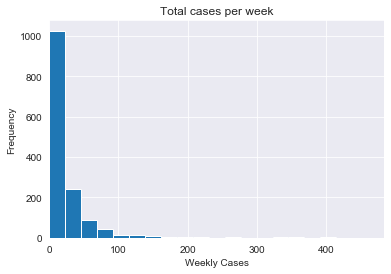

In [7]:
plt.hist(target.total_cases, 20)
plt.title("Total cases per week")
plt.xlim(0)
plt.xlabel("Weekly Cases")
plt.ylabel("Frequency");

In [8]:
# we can see the number of dengue cases each city has had 
target.groupby('city')['total_cases'].sum()

city
iq     3934
sj    31993
Name: total_cases, dtype: int64

In [9]:
#looking at both cities during the same time frame to rid of extra data from before IQ recordings
print("cases in SJ:",target[target['city']=='sj'][target['year']>=2000].total_cases.sum())
print("cases in IQ:",target[target['city']=='iq'][target['year']<2009].total_cases.sum())

cases in SJ: 8396
cases in IQ: 3387


C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df = pd.merge(features, target, on=["city","year","weekofyear"])
df.sort_values(['city','year','weekofyear'],inplace=True)

df_sj = df[df.city=='sj'].set_index('week_start_date',drop=True)
df_iq = df[df.city=='iq'].set_index('week_start_date',drop=True)

In [11]:
def switch(city):
    switch={'sj':df_sj, 'iq':df_iq}
    return switch[city]

In [12]:
#plot annual pattern of feature per week, given city, year,feature
def yearly_pattern(city,year, feature):
    quarters=np.append(1,13*np.arange(1,5))
    quarter_labels=['Jan','Apr','Jul','Oct','Dec']
    df_pattern = switch(city)
    df_pattern = df_pattern[df_pattern.year == year]
    plt.bar(df_pattern.weekofyear, df_pattern[feature], label=year)
    plt.xticks(quarters,quarter_labels)
    plt.xlim([0,54])
    plt.xlabel("Quarter")
    plt.ylabel(feature)

<br>San Juan cases pattern:

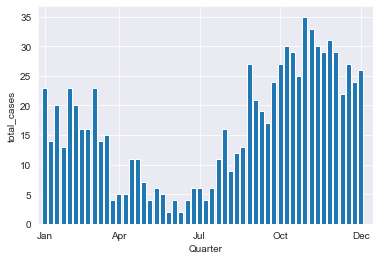

In [13]:
yearly_pattern('sj',1996,'total_cases')

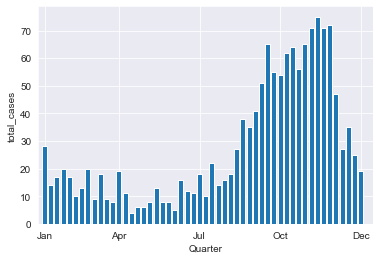

In [14]:
yearly_pattern('sj',2001,'total_cases')

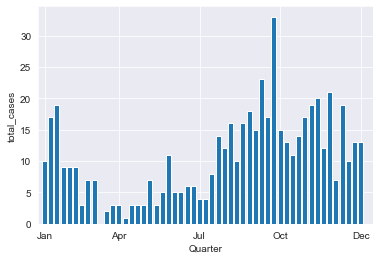

In [15]:
yearly_pattern('sj',2006,'total_cases')

###### Conclusion for San Juan
We see a regular seasonality in the number of cases for San Juan with an increasing case rate in the later parts of the year, in Q3,Q4.

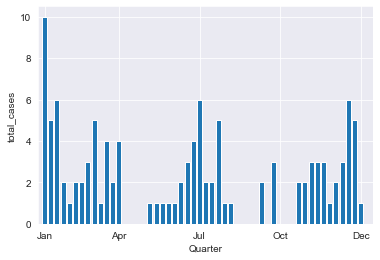

In [16]:
yearly_pattern('iq',2003,'total_cases')

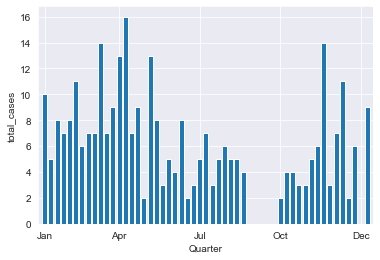

In [17]:
yearly_pattern('iq',2005,'total_cases')

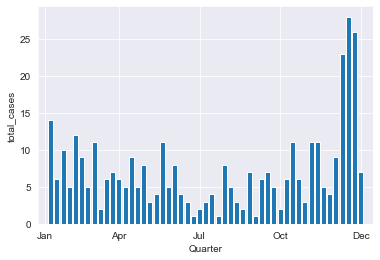

In [18]:
yearly_pattern('iq',2007,'total_cases')

###### Conclusion for Iquitos
There is no strong annual pattern in number of cases per week. We'll have to see if there is an annual pattern in the climate data that dissents our trend in cases. 

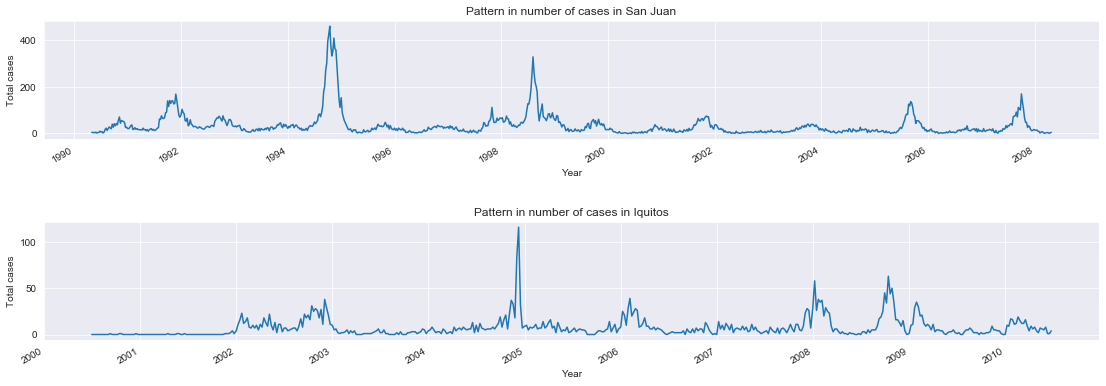

In [19]:
plt.subplot(211)
df_sj.total_cases.plot(figsize=(16,6))
plt.ylabel('Total cases')
plt.title('Pattern in number of cases in San Juan')
plt.xlabel('Year')

plt.subplot(212)
df_iq.total_cases.plot(figsize=(16,6))
plt.ylabel('Total cases')
plt.title('Pattern in number of cases in Iquitos')
plt.xlabel('Year')
plt.tight_layout(pad=3)

###### Overall trend in cases
Examining both cities, minus the last year's data, we see spikes of dengue cases in several years. In San Juan we see spikes in 1994 and 1998. Iquitos has higher numbers in 2002, 2004, and 2008 but not as strong of a spike as in San Juan data.

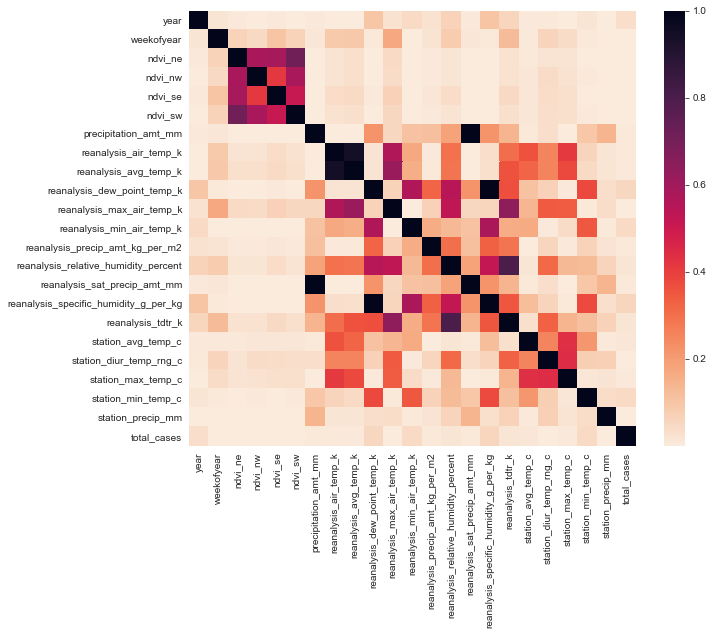

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df_iq.corr()**2, cmap = sns.cm.rocket_r);

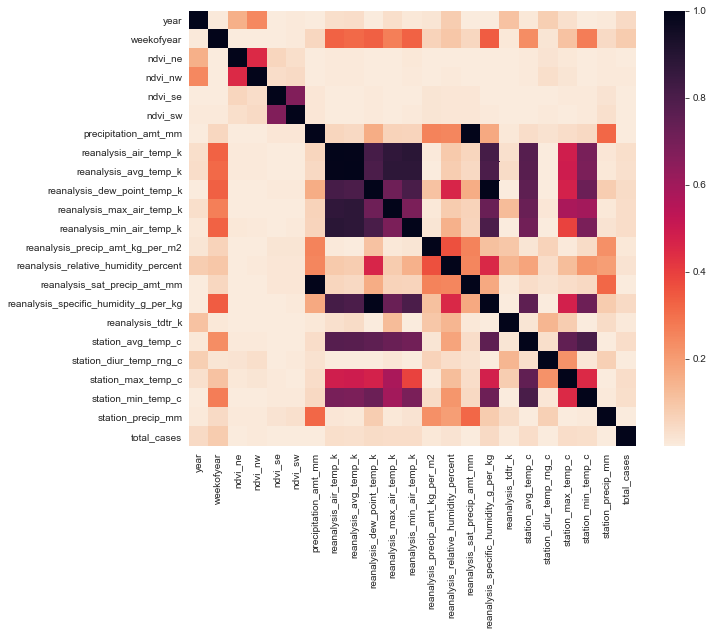

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df_sj.corr()**2, cmap = sns.cm.rocket_r);

Correlations:

Total cases don't seem highly correlated with any feature in particular.

We see a couple of differences in the feature correlations between the cities. The reanalysis tempurature data appears more strongly correlated in San Jaun than in Iquitos.

Another difference we see is that the NVDI Vegetation index is moderately related in the quadrants of Iquitos, while in San Juan, it looks like the northern and southern areas change more independantly of the another.

   <br>We'll look at this data in terms of a time series and examine some of these features for patterns and changes over time.

### NDVI

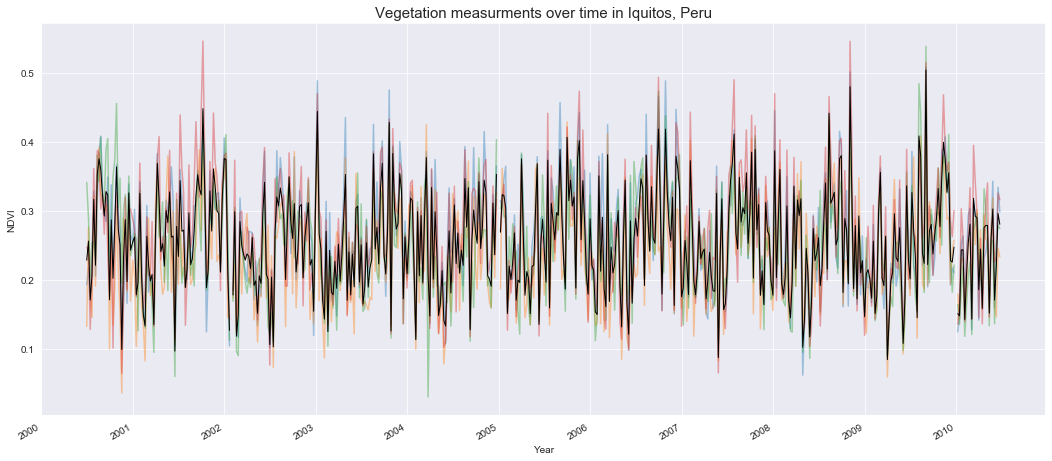

In [22]:
#NDVI over time in Iquitos
for i in df_iq.columns[3:7]:
    df_iq[i].plot(alpha=0.4, figsize=(18,8))
df_iq[df_iq.columns[3:7]].mean(axis=1).plot(color='k', lw=1)
plt.title('Vegetation measurments over time in Iquitos, Peru', size=15)
plt.xlabel('Year')
plt.ylabel('NDVI');

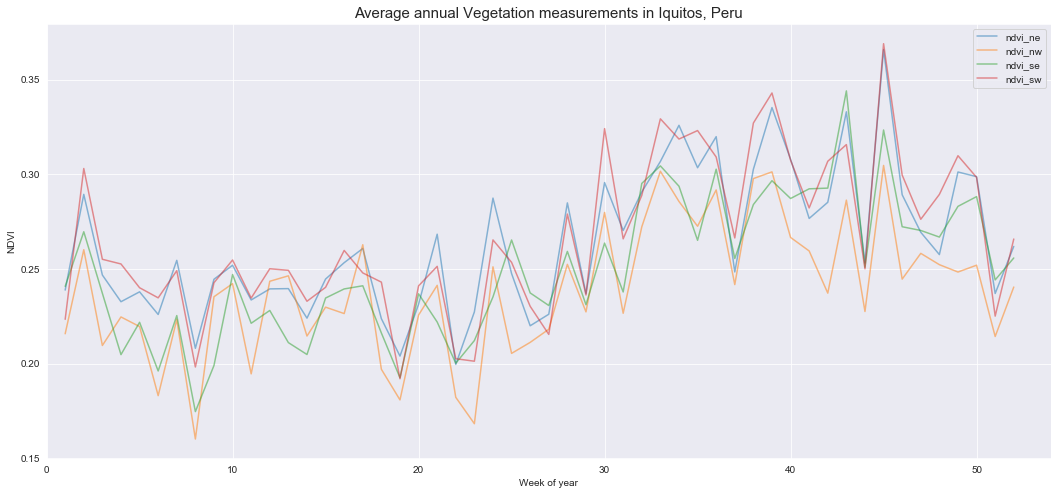

In [23]:
#Average annual NDVI by week in Iquitos
for i in df_iq.columns[3:7]:
    df_iq.groupby('weekofyear')[i].mean().plot(alpha=0.5, figsize=(18,8), label=i)
plt.title("Average annual Vegetation measurements in Iquitos, Peru", size=15)
plt.ylabel('NDVI')
plt.xlabel('Week of year')
plt.xlim([0,54])
plt.legend();

##### Conclusion for Iquitos:
   We see some breaks in the plots which are our missing data records, but we see a general pattern about the city's mean vegetation index. Looking at it by week, we can see a general increase in the later part of the year, and a decrease in the earlier part of the year.

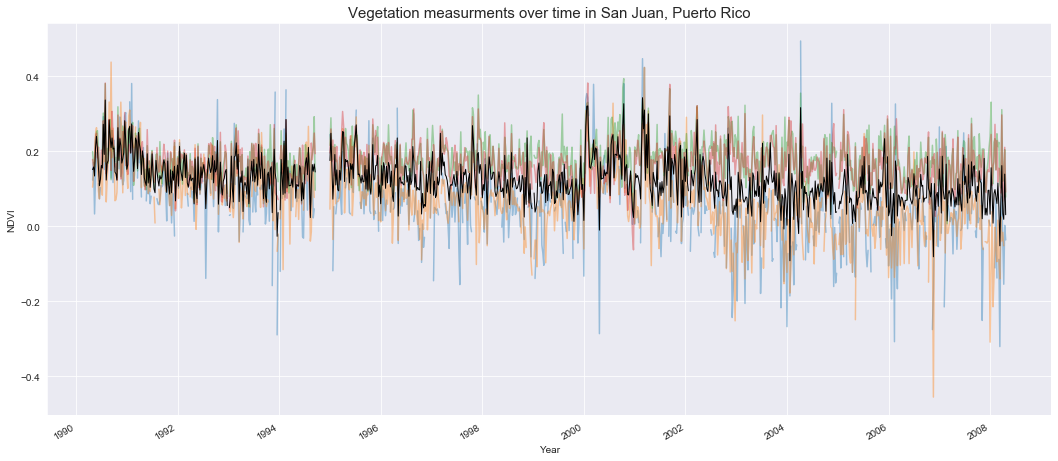

In [24]:
#NDVI long term plot for San Juan
for i in df_sj.columns[3:7]:
    df_sj[i].plot(alpha=0.4, figsize=(18,8))
df_sj[df_sj.columns[3:7]].mean(axis=1).plot(color='k', lw=1)
plt.title('Vegetation measurments over time in San Juan, Puerto Rico', size=15)
plt.xlabel('Year')
plt.ylabel('NDVI');

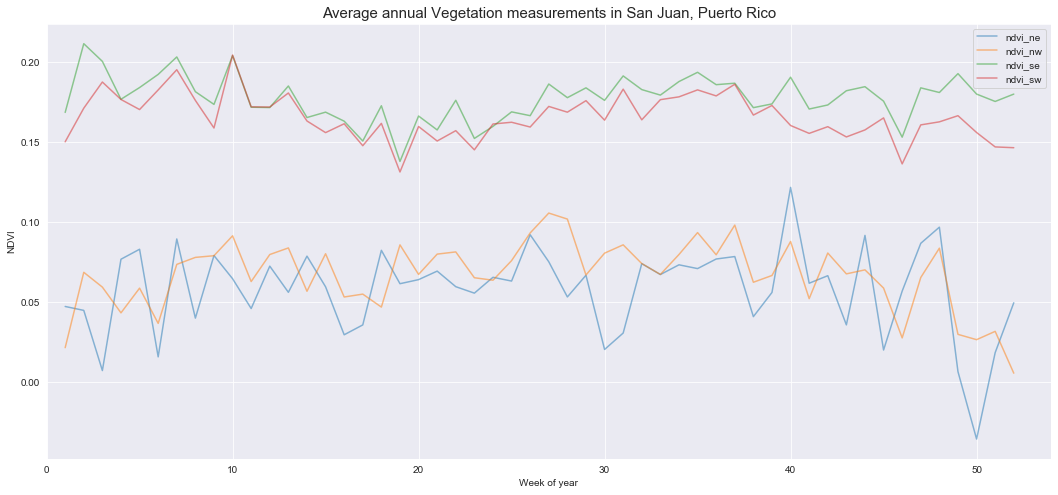

In [25]:
# Average annual NDVI by week in San Juan
for i in df_sj.columns[3:7]:
    df_sj.groupby('weekofyear')[i].mean().plot(alpha=0.5, figsize=(18,8), label=i)
plt.title("Average annual Vegetation measurements in San Juan, Puerto Rico", size=15)
plt.ylabel('NDVI')
plt.xlabel('Week of year')
plt.xlim([0,54])
plt.legend();

##### Conclusion for San Juan:
   We see a break in 1995 for our vegetation data, meaning we have a lot of missing data we need to worry about. Long term, we see the NDVI scores might jump up and down but they don't show a general trend. By week, like we saw in the correlation heatmap, the Northern quadrants(blue and orange) are more seperate from the Southern quadrants(red and green). The northern quadrants consistantly have a lower vegetation index than our southern quadrants. This may make things slighly more complicated in our feature selection and modeling.
   
Note that both cities have missing vegetation data, with San Juan having much more missing. This means that the average by week of year plots are slighly bias, but given the larger amount of data we have for San Juan, we can be fairly certain that this plot is close to accurate.

<br>

### Tempurature and Weather
In order to compare and visualize tempurature and weather data, we need to standardize them. We can take this oppurtunity to approximate the missing values using KNN.

#### Preprocessing

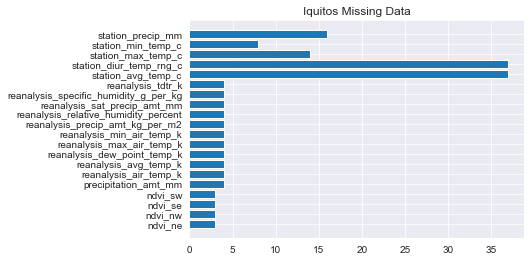

In [26]:
#Missing data for Iquitos
missing_iq = df_iq[df_iq.columns[3:-1]].isnull().sum()
plt.barh(missing_iq.index, missing_iq.values)
plt.title('Iquitos Missing Data');

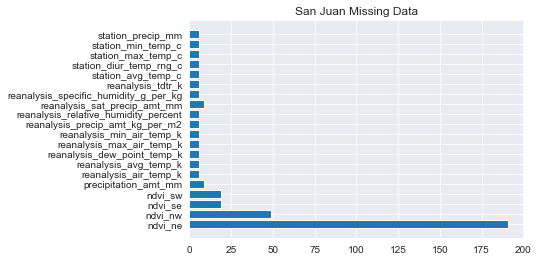

In [27]:
# Missing data for San Juan
missing_sj = df_sj[df_sj.columns[3:-1]].isnull().sum()
plt.barh(missing_sj.index, missing_sj.values)
plt.title('San Juan Missing Data');

In [28]:
# We'll use KNN to try and fill this missing data, rather than just forward fill.
# KNN is based on euclidian distance so we need to scale our data first

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=int(np.sqrt(len(df_sj.columns))), weights='distance')

sj_s = scaler.fit_transform(df_sj[df_sj.columns[3:-1]])
sj_s = imputer.fit_transform(sj_s)
df_sj_s = pd.DataFrame(sj_s, columns=df_sj.columns[3:-1], index=df_sj.index)
df_sj_s['weekofyear'] = df_sj['weekofyear']

In [29]:
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=int(np.sqrt(len(df_iq.columns))), weights='distance')

iq_s = scaler.fit_transform(df_iq[df_iq.columns[3:-1]])
iq_s = imputer.fit_transform(iq_s)
df_iq_s = pd.DataFrame(iq_s, columns=df_iq.columns[3:-1], index=df_iq.index)
df_iq_s['weekofyear'] = df_iq['weekofyear']

#### Now we'll look at the trends of our different data collections scaled and filled.

Looking at different climate measures on a weekly average

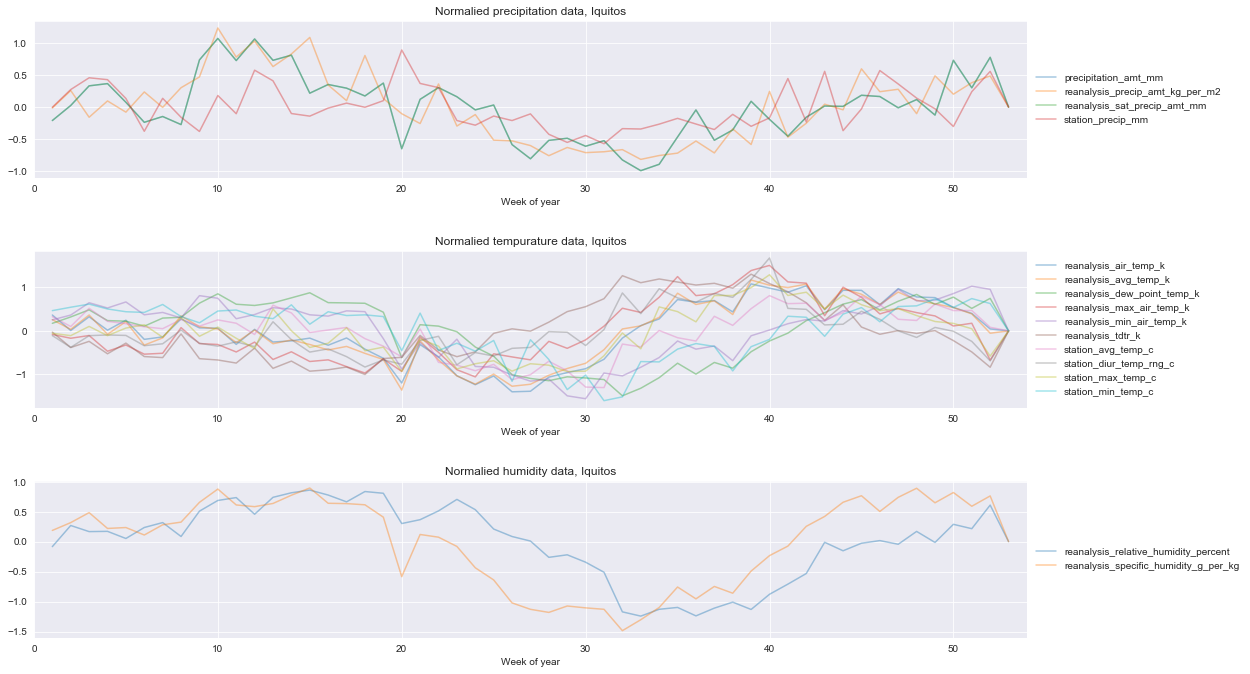

In [30]:
precip_cols = ['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']
temp_cols = ['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
            'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 
            'station_max_temp_c', 'station_min_temp_c']
humidity_cols = ['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']


# Plot different climate data for Iquitos, weekly averages normalized

fig, ax = plt.subplots(3,1,figsize=(18,10))

plt.subplot(311)
for p in precip_cols:
    df_iq_s.groupby('weekofyear')[p].mean().plot(alpha=0.4).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlim(0,54)
plt.xlabel('Week of year')
plt.title("Normalied precipitation data, Iquitos")

plt.subplot(312)
for t in temp_cols:
    df_iq_s.groupby('weekofyear')[t].mean().plot(alpha=0.4).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlim(0,54)
plt.xlabel('Week of year')
plt.title("Normalied tempurature data, Iquitos")

plt.subplot(313)
for h in humidity_cols:
    df_iq_s.groupby('weekofyear')[h].mean().plot(alpha=0.4).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlim(0,54)
plt.xlabel('Week of year')
plt.title("Normalied humidity data, Iquitos")
plt.tight_layout(pad=3)

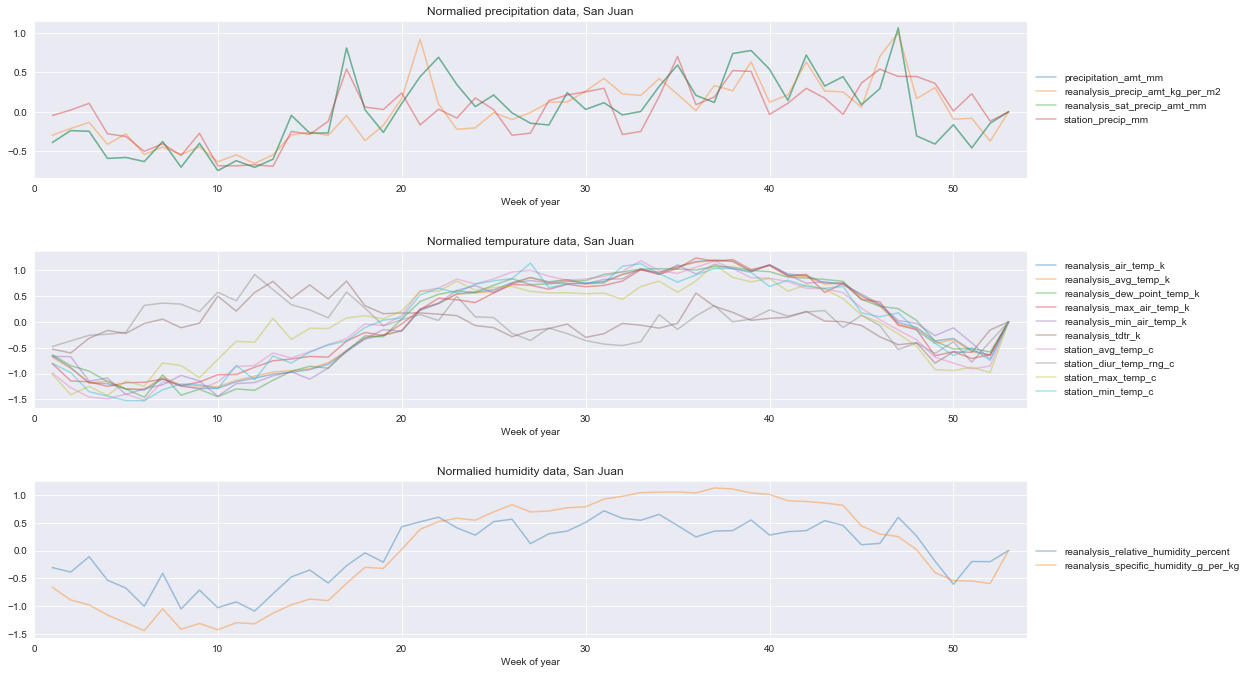

In [31]:
# Plot different climate data for Iquitos, weekly averages normalized
fig, ax = plt.subplots(3,1,figsize=(18,10))

plt.subplot(311)
for p in precip_cols:
    df_sj_s.groupby('weekofyear')[p].mean().plot(alpha=0.4).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlim(0,54)
plt.xlabel('Week of year')
plt.title("Normalied precipitation data, San Juan")

plt.subplot(312)
for t in temp_cols:
    df_sj_s.groupby('weekofyear')[t].mean().plot(alpha=0.4).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlim(0,54)
plt.xlabel('Week of year')
plt.title("Normalied tempurature data, San Juan")

plt.subplot(313)
for h in humidity_cols:
    df_sj_s.groupby('weekofyear')[h].mean().plot(alpha=0.4).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlim(0,54)
plt.xlabel('Week of year')
plt.title("Normalied humidity data, San Juan")
plt.tight_layout(pad=3)

One of the reasons we normalize is to compare these different features that measure the same thing using different units. Otherwise we wouldn't be able to compare precipitation amount in $mm$ with precipitation amount in $\frac{kg}{m^2}$. 

Here we see the climate conditions in San Juan all tend to increase in the later parts of the year, from week 25 to 40, similar to the trend in cases in San Juan we saw earlier. 

Iquitos is more variable. The climate pattersn don't move as concisely or as tightly as that of San Juan. This variablilty reminds us of the variability in the the dengue cases pattern for Iquitos.

Plotting long term climate patterns

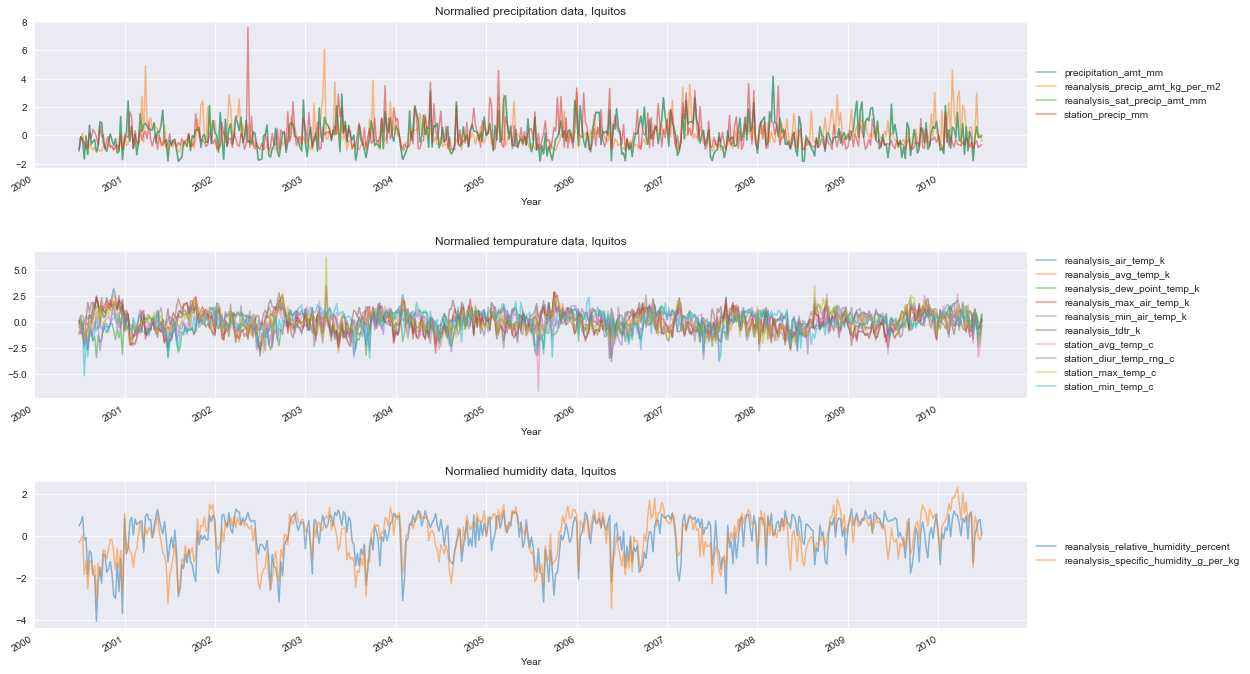

In [32]:
# Iquitos long term trends in the different data categories
fig,ax=plt.subplots(3,1,figsize=(18,10))

plt.subplot(311)
for p in precip_cols:
    df_iq_s[p].plot(alpha=0.5).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Year')
plt.title("Normalied precipitation data, Iquitos")
    
plt.subplot(312)
for t in temp_cols:
    df_iq_s[t].plot(alpha=0.5).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Year')
plt.title("Normalied tempurature data, Iquitos")   

plt.subplot(313)
for h in humidity_cols:
    df_iq_s[h].plot(alpha=0.5).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Year')
plt.title("Normalied humidity data, Iquitos")

plt.tight_layout(pad=3)

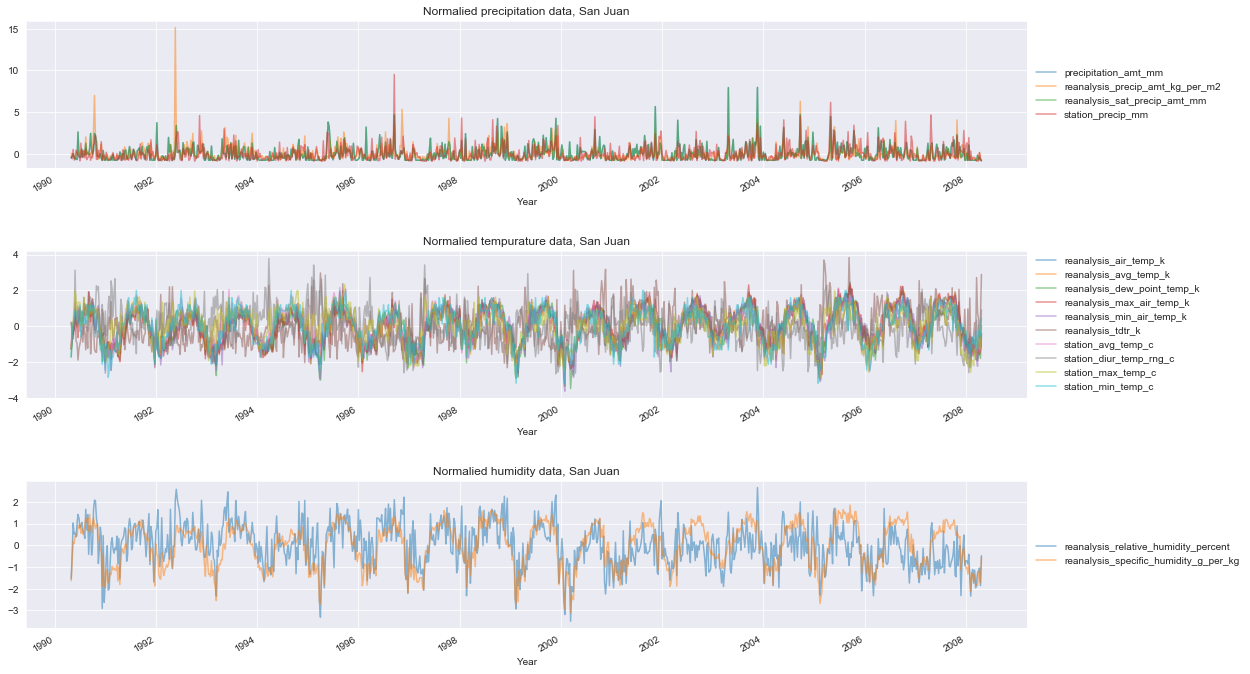

In [33]:
# San Juan long term trends in the different data categories
fig,ax=plt.subplots(3,1,figsize=(18,10))

plt.subplot(311)
for p in precip_cols:
    df_sj_s[p].plot(alpha=0.5).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Year')
plt.title("Normalied precipitation data, San Juan")
    
plt.subplot(312)
for t in temp_cols:
    df_sj_s[t].plot(alpha=0.5).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Year')
plt.title("Normalied tempurature data, San Juan")  
    
plt.subplot(313)
for h in humidity_cols:
    df_sj_s[h].plot(alpha=0.5).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Year')
plt.title("Normalied humidity data, San Juan")    
    
plt.tight_layout(pad=3)

We see in both cities have a fairly consistant pattern for in the three data categories. San Juan seems to have a more normal pattern of precipitation, while having more seasonality in its tempurature measures. Iquitos is much closer to the equator than San Juan is which may help explain some of this seasonality and the wind patterns near the equator may account for some of the rainfall measures. NOAA has a nice visual and explination here: https://www.climate.gov/news-features/understanding-climate/annual-migration-tropical-rain-belt

We can look at how these patterns in climate data line up with the cases in each city

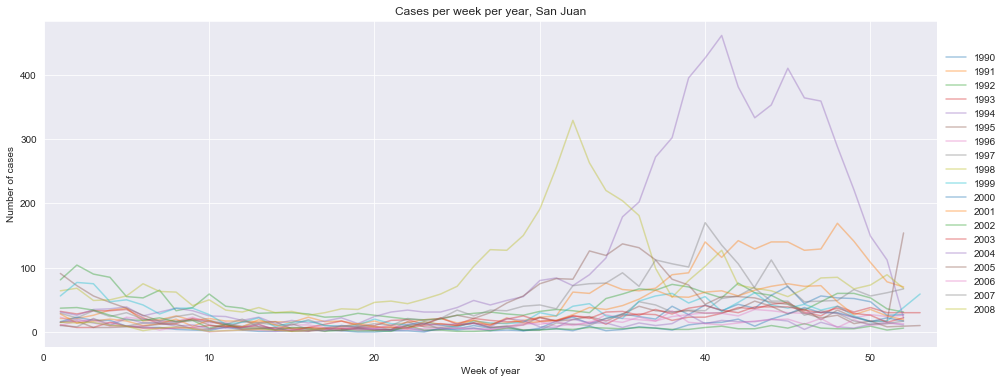

In [34]:
plt.figure(figsize=(16,6))
for y in df_sj.year.unique():
    df_sj[df_sj.year==y].set_index('weekofyear')['total_cases'].plot(alpha=0.4, label=y).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Week of year')
plt.xlim(0,54)
plt.ylabel('Number of cases')
plt.title('Cases per week per year, San Juan');

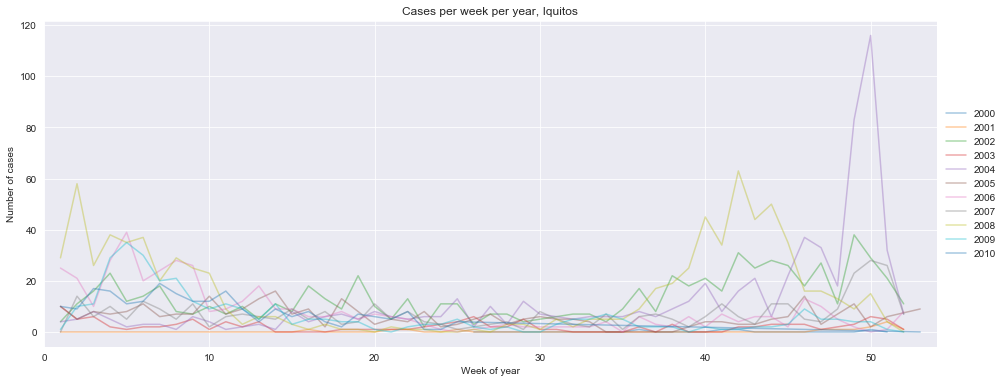

In [35]:
plt.figure(figsize=(16,6))
for y in df_iq.year.unique():
    df_iq[df_iq.year==y].set_index('weekofyear')['total_cases'].plot(alpha=0.4, label=y).legend(loc='center left',bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Week of year')
plt.xlim(0,54)
plt.ylabel('Number of cases')
plt.title('Cases per week per year, Iquitos');

So we see that both places had outbreaks towards the end of the year, with San Juan having an outbreak in 1998 a little eariler in, around week 30. Overall, we see that Iquitos had a higher number of cases and outbreaks between week 40 and 50, and some in the first few weeks of the year, while San Juan seems to mostly have higher case numbers later in the year, between week 30 and 45. 